# Paging Algorithms Visualization

In [1]:
import matplotlib.pyplot as plt

## FIFO

In [2]:
# Number of page frames

pf = 3
reference_string = [1,3,0,3,5,6,3]

In [3]:
def calculate_page_hits(rf_string,page_frames):
    page = []
    hits = 0
    for el in rf_string:
        if len(page) < page_frames:
            hits = hits+1
            page.append(el)
        else:
            if el in page:
                pass
            else:
                hits = hits +1
                page.pop(0)
                page.append(el)
    
    return hits
            

In [4]:
def plot_graph(x,y,color:str):
    plt.title("Page Faults")
    plt.xlabel("No. of Frames")
    plt.ylabel("No. of Page Faults")
    plt.plot(x,y,color=color)
    plt.show()

In [5]:
faults = {}

for i in range(3,10):
    f = calculate_page_hits(reference_string,i)
    faults[str(i)] = f

faults

{'3': 6, '4': 6, '5': 6, '6': 6, '7': 7, '8': 7, '9': 7}

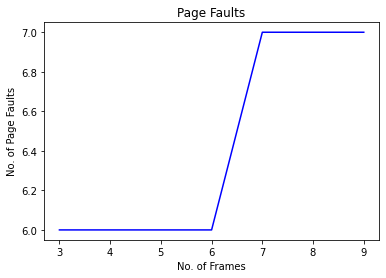

In [6]:
#Plotting
plot_graph(faults.keys(),faults.values(),"blue")

In [7]:
ref_str_2 = [3, 2, 1, 0, 3, 2, 4, 3, 2, 1, 0, 4]

faults_2 = {}

for i in range(3,10):
    f = calculate_page_hits(ref_str_2,i)
    faults_2[str(i)] = f

faults_2

{'3': 9, '4': 10, '5': 6, '6': 7, '7': 7, '8': 8, '9': 9}

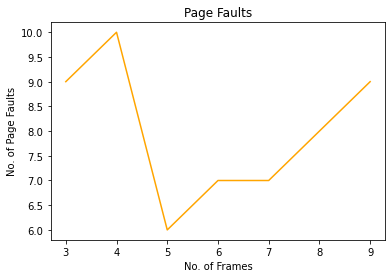

In [8]:
#Plotting
plot_graph(faults_2.keys(),faults_2.values(),"orange")

## 2. Optimal Page replacement 

In [9]:
def check_distance(rf,page):
    indices = []
    for el in page:
        if el in rf:
            index = rf.index(el)
        else:
            index = len(page)+1
        indices.append(index)
    
    max_distance = max(indices)
    max_distance_el_index = indices.index(max_distance)
    return max_distance_el_index

def optimal_page_hits(rf_string,page_frames):
    page = []
    hits = 0
    key = 0
    for el in rf_string:
        key = key+1
        if len(page) < page_frames:
            hits = hits+1
            page.append(el)
        else:
            if el in page:
                pass
            else:
                hits = hits+1
                index = check_distance(rf_string[key:len(rf_string)],page)
                page[index] = el
    return hits
                

In [10]:
rf_string = [7, 0, 1, 2, 0, 3, 0, 4, 2, 3, 0, 3, 2,]

optimal_faults = {}

for i in range(3,10):
    hits = optimal_page_hits(rf_string,i)
    optimal_faults[str(i)] = hits
optimal_faults

{'3': 7, '4': 6, '5': 7, '6': 7, '7': 8, '8': 8, '9': 9}

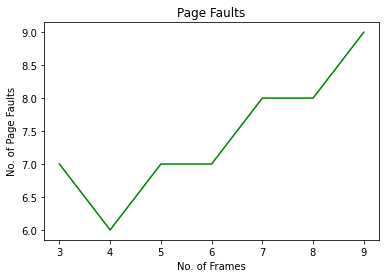

In [11]:
#Plotting
plot_graph(optimal_faults.keys(),optimal_faults.values(),"green")

In [12]:
optimal_faults_2 = {}

for i in range(3,10):
    hits = optimal_page_hits(ref_str_2,i)
    optimal_faults_2[str(i)] = hits
optimal_faults_2

{'3': 7, '4': 6, '5': 7, '6': 8, '7': 7, '8': 8, '9': 9}

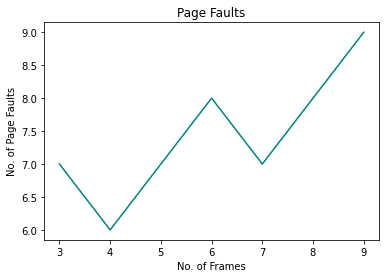

In [13]:
#Plotting
plot_graph(optimal_faults_2.keys(),optimal_faults_2.values(),"teal")

## 3. Least Recently Used 

In [18]:
def least_recent_page_hits(rf_string,page_frames):
    page = []
    hits = 0
    
    for el in rf_string:
        if len(page) < page_frames:
            hits = hits+1
            page.append(el)
        else:
            if el in page:
                page.remove(el)
                page.append(el)
            else:
                hits = hits + 1
                page.pop(0)
                page.append(el)
    return hits

In [20]:
ref = [7, 0, 1, 2, 0, 3, 0, 4, 2, 3, 0, 3, 2]


lru_faults = {}
for i in range(3,10):
    hits = least_recent_page_hits(ref,i)
    lru_faults[str(i)] = hits

lru_faults

{'3': 9, '4': 6, '5': 7, '6': 7, '7': 8, '8': 8, '9': 9}

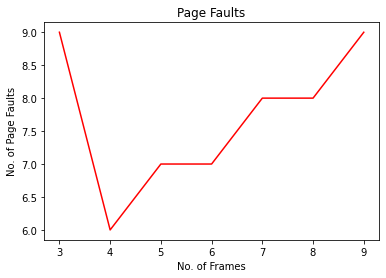

In [22]:
#Plotting
plot_graph(lru_faults.keys(),lru_faults.values(),"red")

In [23]:
lru_faults_2 = {}
for i in range(3,10):
    hits = least_recent_page_hits(ref_str_2,i)
    lru_faults_2[str(i)] = hits

lru_faults_2

{'3': 10, '4': 8, '5': 6, '6': 7, '7': 7, '8': 8, '9': 9}

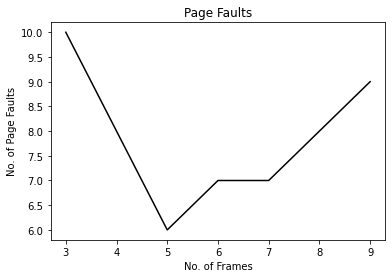

In [24]:
#Plotting
plot_graph(lru_faults_2.keys(),lru_faults_2.values(),"black")